### Import

In [28]:
import os
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import spectral.io.aviris as aviris
import colour
from PIL import Image
from scipy.stats import multivariate_normal as mnorm
from scipy import ndimage
from matplotlib import cm
from mpl_toolkits import mplot3d
from skimage import io, color
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import matplotlib.tri as mtri

### Fonts

In [29]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Draw Patches of increasing Luminance

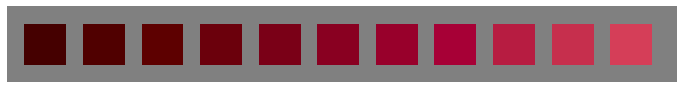

In [33]:
fig, ax = plt.subplots(figsize=(12,12))
background = np.zeros((90,800,3)).astype('uint8') + 128
for i in range(11):
    xpos = 20 + (i * 70)
    LAB = np.zeros((1,3))
    LAB[0,0] = (i*5)
    LAB[0,1] = 60
    LAB[0,2] = 20
    RGB = color.lab2rgb(LAB)
    rect = patches.Rectangle((xpos, 20), 50, 50, linewidth=0, facecolor=RGB)
    ax.imshow(background)
    ax.add_patch(rect);
plt.axis('off');
plt.savefig('../../assets/matplotlib/019_luminance.png',dpi=300,bbox_inches="tight")

### Draw Patches of increasing Saturation

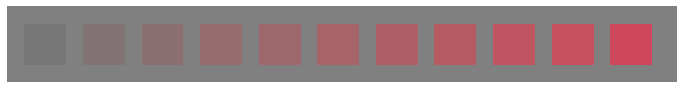

In [34]:
fig, ax = plt.subplots(figsize=(12,12))
background = np.zeros((90,800,3)).astype('uint8') + 128
for i in range(11):
    xpos = 20 + (i * 70)
    LAB = np.zeros((1,3))
    LAB[0,0] = 50
    LAB[0,1] = 60*(i/11)
    LAB[0,2] = 20*(i/11)
    RGB = color.lab2rgb(LAB)
    rect = patches.Rectangle((xpos, 20), 50, 50, linewidth=0, facecolor=RGB)
    ax.imshow(background)
    ax.add_patch(rect);
plt.axis('off');
plt.savefig('../../assets/matplotlib/019_saturation.png',dpi=300,bbox_inches="tight")

### Draw Patches of changing hue

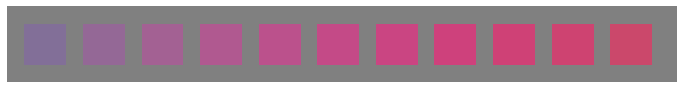

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
background = np.zeros((90,800,3)).astype('uint8') + 128
for i in range(11):
    xpos = 740 - (20 + (i * 70))
    angle = i-2.5
    angle = (angle / 180 * np.pi * 10)
    LAB = np.zeros((1,3))
    LAB[0,0] = 50
    LAB[0,1] = np.cos(-angle)*60
    LAB[0,2] = np.sin(-angle)*20
    RGB = color.lab2rgb(LAB)
    rect = patches.Rectangle((xpos, 20), 50, 50, linewidth=0, facecolor=RGB)
    ax.imshow(background)
    ax.add_patch(rect);
plt.axis('off');
plt.savefig('../../assets/matplotlib/019_hue.png',dpi=300,bbox_inches="tight")

### Create Color wheel from A-B Perspective

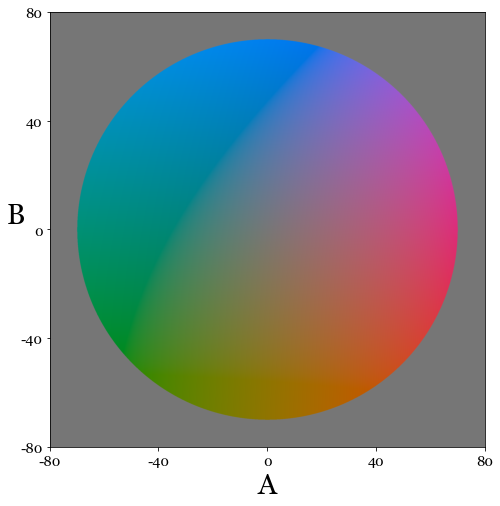

In [44]:
plt.figure(figsize=(8,8))
resolution = 2048
a = np.linspace(-80,80,resolution,True)
b = np.linspace(-80,80,resolution,True)
A,B = np.meshgrid(a,b)
L = np.zeros((A.shape)) + 50
D = np.sqrt(A**2 + B**2)
A[D > 70] = 0
B[D > 70] = 0
L[D > 70] = 50
LAB = np.array([L.ravel(),A.ravel(),B.ravel()]).T
RGB = color.lab2rgb(LAB);
RGB = np.reshape(RGB,(resolution,resolution,3));
plt.imshow(RGB,extent=(-80,80,-80,80))
plt.xlabel('A',fontsize=28,**csfont);
plt.ylabel('B',fontsize=28,**csfont,rotation=0);
plt.yticks(np.linspace(-80,80,5),labels=np.linspace(-80,80,5).astype(int),fontsize=14,**csfont);
plt.xticks(np.linspace(-80,80,5),labels=np.linspace(-80,80,5).astype(int),fontsize=14,**csfont);
plt.savefig('../../assets/matplotlib/019_LAB1.png',dpi=300,bbox_inches="tight")

### Create Color wheel from L-A Perspective

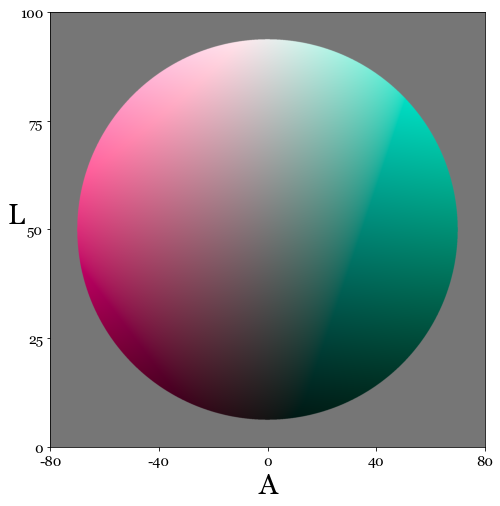

In [45]:
plt.figure(figsize=(8,8))
resolution = 2048
a = np.linspace(-80,80,resolution,True)
b = np.linspace(-80,80,resolution,True)
l = np.linspace(0,100,resolution,True)
A,B = np.meshgrid(a,b)
L = np.tile(l,(A.shape[0],1)).T
L.shape
D = np.sqrt(A**2 + B**2)
A[D > 70] = 0
B[D > 70] = 0
L[D > 70] = 50
LAB = np.array([L.ravel(),A.ravel(),B.ravel()]).T
LAB[:,2] = 0
RGB = color.lab2rgb(LAB);
RGB = np.reshape(RGB,(resolution,resolution,3));
RGB = np.fliplr(RGB)
RGB = np.flipud(RGB)
plt.imshow(RGB,extent=(-80,80,0,100),aspect=1.6)
plt.xlabel('A',fontsize=28,**csfont);
plt.ylabel('L',fontsize=28,**csfont,rotation=0);
plt.yticks(np.linspace(0,100,5),labels=np.linspace(0,100,5).astype(int),fontsize=14,**csfont);
plt.xticks(np.linspace(-80,80,5),labels=np.linspace(-80,80,5).astype(int),fontsize=14,**csfont);
plt.savefig('../../assets/matplotlib/019_LAB2.png',dpi=300,bbox_inches="tight")

### Create Color wheel from L-B Perspective

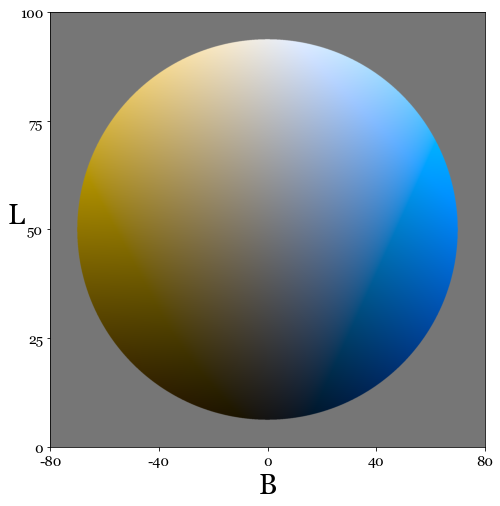

In [46]:
plt.figure(figsize=(8,8))
resolution = 2048
a = np.linspace(-80,80,resolution,True)
b = np.linspace(-80,80,resolution,True)
l = np.linspace(0,100,resolution,True)
A,B = np.meshgrid(a,b)
L = np.tile(l,(A.shape[0],1))
L.shape
D = np.sqrt(A**2 + B**2)
A[D > 70] = 0
B[D > 70] = 0
L[D > 70] = 50
LAB = np.array([L.ravel(),A.ravel(),B.ravel()]).T
LAB[:,1] = 0
RGB = color.lab2rgb(LAB);
RGB = np.reshape(RGB,(resolution,resolution,3));
RGB = np.flipud(RGB)
RGB = np.rot90(RGB)
plt.imshow(RGB,extent=(-80,80,0,100),aspect=1.6)
plt.xlabel('B',fontsize=28,**csfont);
plt.ylabel('L',fontsize=28,**csfont,rotation=0);
plt.yticks(np.linspace(0,100,5),labels=np.linspace(0,100,5).astype(int),fontsize=14,**csfont);
plt.xticks(np.linspace(-80,80,5),labels=np.linspace(-80,80,5).astype(int),fontsize=14,**csfont);
plt.savefig('../../assets/matplotlib/019_LAB3.png',dpi=300,bbox_inches="tight")

### Create Texture Only Versions without labels for rendering

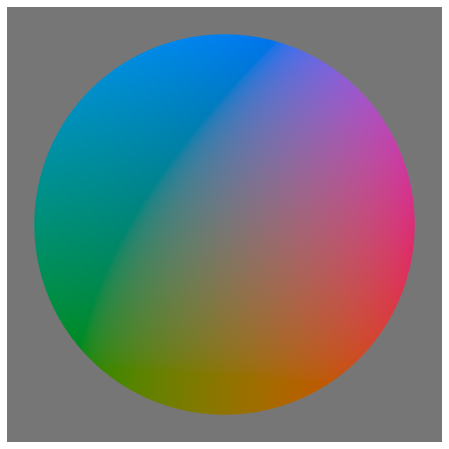

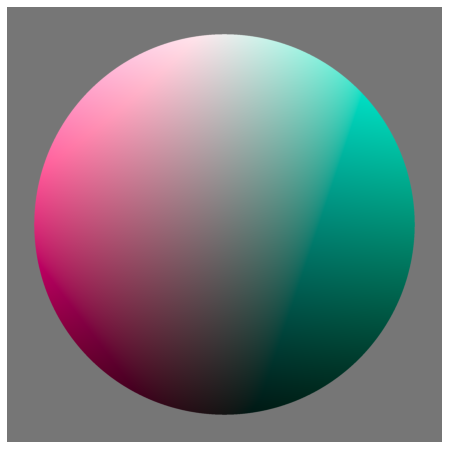

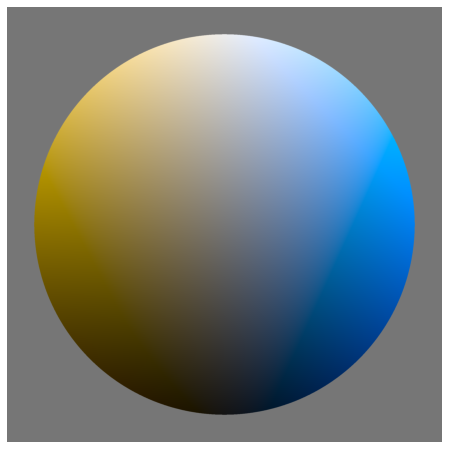

In [50]:
plt.figure(figsize=(8,8))
resolution = 2048
a = np.linspace(-80,80,resolution,True)
b = np.linspace(-80,80,resolution,True)
A,B = np.meshgrid(a,b)
L = np.zeros((A.shape)) + 50
D = np.sqrt(A**2 + B**2)
A[D > 70] = 0
B[D > 70] = 0
L[D > 70] = 50
LAB = np.array([L.ravel(),A.ravel(),B.ravel()]).T
RGB = color.lab2rgb(LAB);
RGB = np.reshape(RGB,(resolution,resolution,3));
plt.imshow(RGB,extent=(-80,80,-80,80))
plt.axis('off')
plt.savefig('../../assets/matplotlib/019_LAB1_texture.png',dpi=300,bbox_inches="tight")

plt.figure(figsize=(8,8))
a = np.linspace(-80,80,resolution,True)
b = np.linspace(-80,80,resolution,True)
l = np.linspace(0,100,resolution,True)
A,B = np.meshgrid(a,b)
L = np.tile(l,(A.shape[0],1)).T
L.shape
D = np.sqrt(A**2 + B**2)
A[D > 70] = 0
B[D > 70] = 0
L[D > 70] = 50
LAB = np.array([L.ravel(),A.ravel(),B.ravel()]).T
LAB[:,2] = 0
RGB = color.lab2rgb(LAB);
RGB = np.reshape(RGB,(resolution,resolution,3));
RGB = np.fliplr(RGB)
RGB = np.flipud(RGB)
plt.imshow(RGB,extent=(-80,80,0,100),aspect=1.6)
plt.axis('off')
plt.savefig('../../assets/matplotlib/019_LAB2_texture.png',dpi=300,bbox_inches="tight")

plt.figure(figsize=(8,8))
resolution = 2048
a = np.linspace(-80,80,resolution,True)
b = np.linspace(-80,80,resolution,True)
l = np.linspace(0,100,resolution,True)
A,B = np.meshgrid(a,b)
L = np.tile(l,(A.shape[0],1))
L.shape
D = np.sqrt(A**2 + B**2)
A[D > 70] = 0
B[D > 70] = 0
L[D > 70] = 50
LAB = np.array([L.ravel(),A.ravel(),B.ravel()]).T
LAB[:,1] = 0
RGB = color.lab2rgb(LAB);
RGB = np.reshape(RGB,(resolution,resolution,3));
RGB = np.flipud(RGB)
RGB = np.rot90(RGB)
plt.imshow(RGB,extent=(-80,80,0,100),aspect=1.6)
plt.axis('off')
plt.savefig('../../assets/matplotlib/019_LAB3_texture.png',dpi=300,bbox_inches="tight")